<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Raw-data-stats" data-toc-modified-id="Raw-data-stats-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Raw data stats</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read in data</a></span><ul class="toc-item"><li><span><a href="#Produce-latex-table" data-toc-modified-id="Produce-latex-table-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Produce latex table</a></span></li><li><span><a href="#Add-region" data-toc-modified-id="Add-region-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Add region</a></span></li></ul></li><li><span><a href="#Calculate-number-of-empty-tiles" data-toc-modified-id="Calculate-number-of-empty-tiles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate number of empty tiles</a></span><ul class="toc-item"><li><span><a href="#Create-sample-to-check-what's-empty" data-toc-modified-id="Create-sample-to-check-what's-empty-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create sample to check what's empty</a></span></li></ul></li><li><span><a href="#highest-number-of-markings-per-tile" data-toc-modified-id="highest-number-of-markings-per-tile-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>highest number of markings per tile</a></span></li><li><span><a href="#Convert-distance-to-meters" data-toc-modified-id="Convert-distance-to-meters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Convert distance to meters</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reduction-of-number-of-fan-markings-to-finals" data-toc-modified-id="Reduction-of-number-of-fan-markings-to-finals-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Reduction of number of fan markings to finals</a></span></li></ul></li></ul></li><li><span><a href="#Length-stats" data-toc-modified-id="Length-stats-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Length stats</a></span><ul class="toc-item"><li><span><a href="#Blotch-sizes" data-toc-modified-id="Blotch-sizes-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Blotch sizes</a></span></li><li><span><a href="#Longest-fans" data-toc-modified-id="Longest-fans-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Longest fans</a></span></li></ul></li><li><span><a href="#North-azimuths" data-toc-modified-id="North-azimuths-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>North azimuths</a></span></li><li><span><a href="#User-stats" data-toc-modified-id="User-stats-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>User stats</a></span></li><li><span><a href="#pipeline-output-examples" data-toc-modified-id="pipeline-output-examples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>pipeline output examples</a></span></li></ul></div>

In [ ]:
%matplotlib widget

In [ ]:
import seaborn as sns

sns.set()
sns.set_context('paper')
sns.set_palette('colorblind')
from planet4 import io, markings, plotting, region_data, stats
from planet4.catalog_production import ReleaseManager

An updated index is available.
Call `get_index` with `refresh=True` to get the updated version.


In [ ]:
fans_fname = "/Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0/P4_catalo"

In [ ]:
fans = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/p4_analysis/P4_catalog_v1.0/P4_catalog_v1.0_L1C_cut_0.5_fan_meta_merged.csv")
blotch = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/p4_analysis/P4_catalog_v1.0/P4_catalog_v1.0_L1C_cut_0.5_blotch_meta_merged.csv")

EmptyDataError: No columns to parse from file

In [ ]:
pd.set_option("display.max_columns", 150)

In [ ]:
fans.head()

In [ ]:
fans.l_s.head().values[0]

In [ ]:
group_blotch = blotch.groupby("obsid")

In [ ]:
type(group_blotch)

In [ ]:
counts = group_blotch.marking_id.count()

In [ ]:
counts.head()

In [ ]:
counts.plot(c='r')

In [ ]:
plt.figure()
counts.hist()

In [ ]:
counts.max()

In [ ]:
counts.min()

In [ ]:
fans.head()

In [ ]:
plt.figure(constrained_layout=True)
counts[:20].plot.bar()

In [ ]:
plt.figure()
counts[:10].plot(use_index=True)

In [ ]:
plt.figure()
counts[:10]

In [ ]:
grouped = fans.groupby("obsid")

In [ ]:
grouped.tile_id.nunique().sort_values(ascending=False).head()

In [ ]:
%matplotlib inline

In [ ]:
from planet4.markings import ImageID

In [ ]:
p4id = ImageID('7t9')

In [ ]:
p4id.image_name

In [ ]:
p4id.plot_fans()

In [ ]:
filtered = fans[fans.tile_id=='APF0000cia']

In [ ]:
filtered.shape

In [ ]:
p4id.plot_fans(data=filtered)

# Raw data stats

In [ ]:
import dask.dataframe as dd

In [ ]:
db = io.DBManager()
db.dbname

Path('/Users/klay6683/local_data/planet4/2018-10-14_planet_four_classifications_queryable_cleaned.parquet')

In [ ]:
db.dbname.exists()

True

In [ ]:
df = dd.read_parquet(db.dbname)

In [ ]:
df.columns

Index(['classification_id', 'created_at', 'image_id', 'image_name', 'image_url', 'user_name', 'marking', 'x_tile', 'y_tile', 'acquisition_date', 'local_mars_time', 'x', 'y', 'image_x', 'image_y',
       'radius_1', 'radius_2', 'distance', 'angle', 'spread', 'version', 'x_angle', 'y_angle'],
      dtype='object')

In [ ]:
obsid = "ESP_012461_0925"
obsid = "ESP_020146_0950"

In [ ]:
df = df[df.image_name==obsid].compute()

In [ ]:
df[df.image_id=="APF0000hy0"].classification_id.nunique()

30

In [ ]:
fans = pd.read_csv("/Users/klay6683/local_data/P4_catalog_v1.1/P4_catalog_v1.1_L1C_cut_0.5_fan.csv")
blotches = pd.read_csv("/Users/klay6683/local_data/P4_catalog_v1.1/P4_catalog_v1.1_L1C_cut_0.5_blotch.csv")

In [ ]:
import hvplot.pandas

In [ ]:
blotches[blotches.obsid==obsid].groupby("tile_id").size().sort_values(ascending=False)

tile_id
APF0000q44    212
APF0000q2t    172
APF0000q3a    156
APF0000q3x    146
APF0000q3k     84
APF0000q3i     67
APF0000q3h     66
APF0000q45     40
APF0000q31     34
APF0000q3c     33
APF0000q2w     28
APF0000q39     27
APF0000q3d     19
APF0000q38     16
APF0000q3z     15
APF0000q34     15
APF0000q3w     14
APF0000q3j     14
APF0000q4d     13
APF0000q2m     12
APF0000q2i     10
APF0000q2r     10
APF0000q4a      8
APF0000q2z      7
APF0000q4f      6
APF0000q49      6
APF0000q43      6
APF0000q47      5
APF0000q35      5
APF0000q33      5
APF0000q32      5
APF0000q2o      5
APF0000q3l      4
APF0000q3u      4
APF0000q2u      3
APF0000q2q      3
APF0000q3y      3
APF0000q37      3
APF0000q2s      2
APF0000q41      2
APF0000q48      2
APF0000q3t      2
APF0000q3v      2
APF0000q3s      2
APF0000q3p      2
APF0000q3n      2
APF0000q2y      2
APF0000q2k      2
APF0000q3f      2
APF0000q4g      2
APF0000q36      1
APF0000q40      1
APF0000q3o      1
APF0000q3m      1
APF0000q2n      1
AP

In [ ]:
tile_id="APF0000hyy"
tile_id="APF0000q3k"

In [ ]:
from planet4.markings import TileID

In [ ]:
tile = TileID(tile_id)

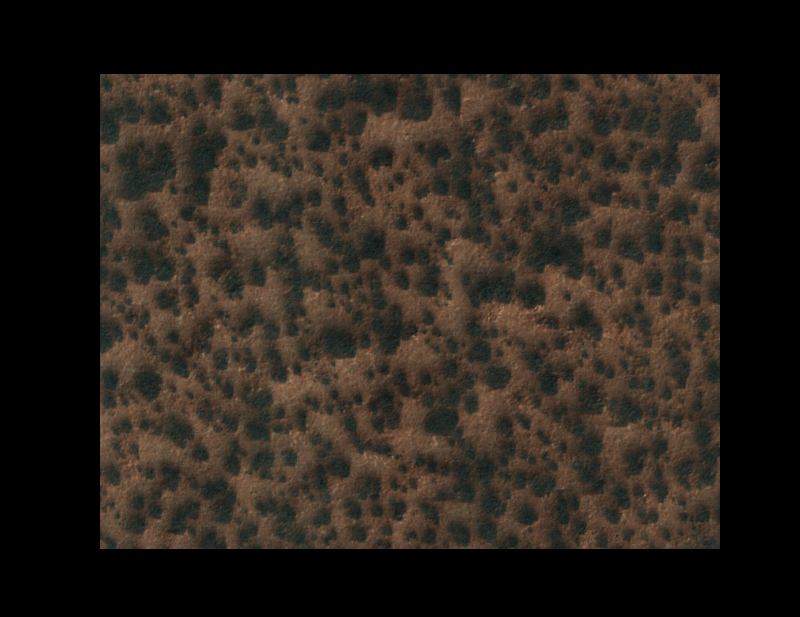

In [ ]:
tile.show_subframe()

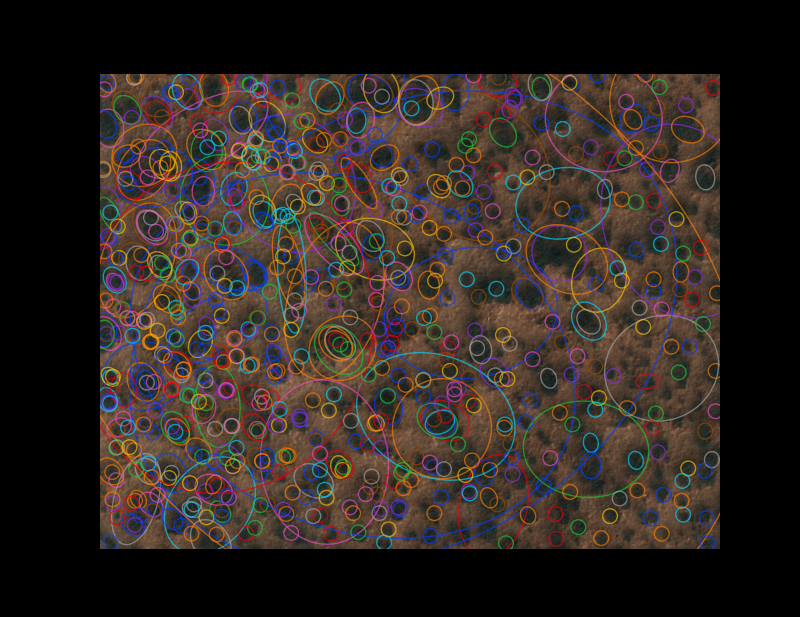

In [ ]:
tile.plot_blotches()

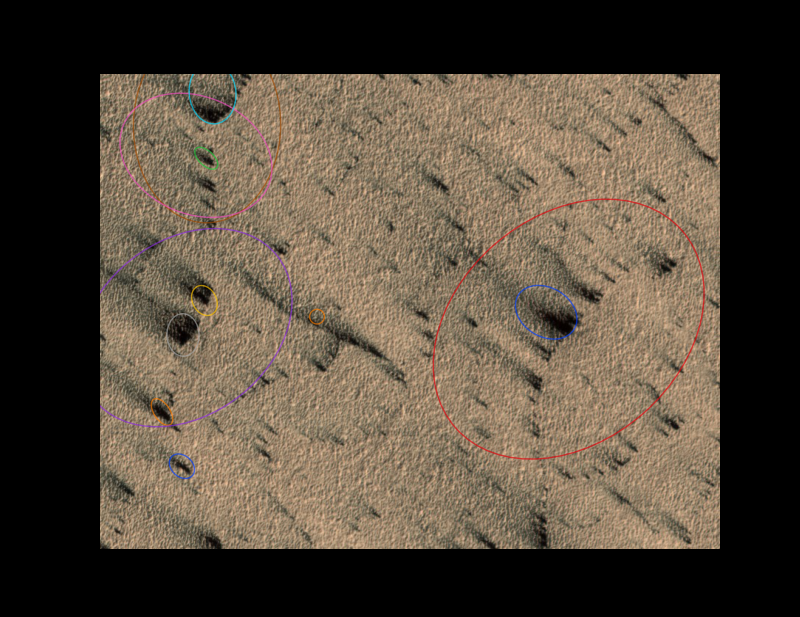

In [ ]:
tile.plot_blotches()

In [ ]:
datapath="/Users/klay6683/local_data/P4_catalog_v1.1"

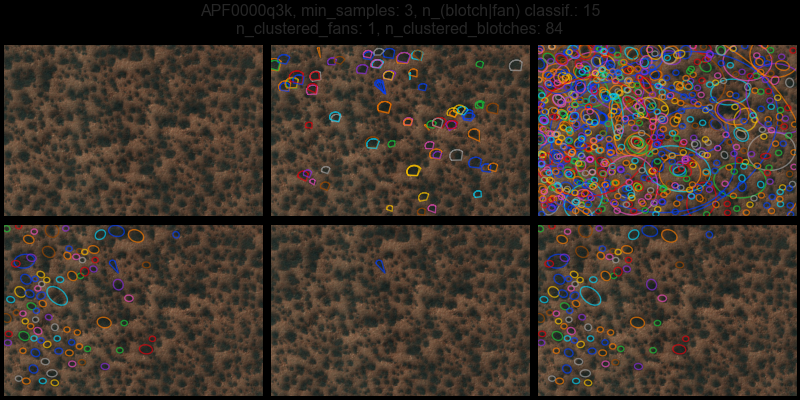

In [ ]:
plotting.plot_image_id_pipeline(tile_id, datapath=datapath, save=True, figsize=(8,4))

In [ ]:
pm = io.PathManager(tile_id, datapath="/Users/klay6683/local_data/P4_catalog_v1.1")

In [ ]:
pm.final_fanfile.parent / "plots"

Path('/Users/klay6683/local_data/P4_catalog_v1.1/ESP_012461_0925/APF0000hyy/L1C_cut_0.5/plots')

In [ ]:
df.image_id.nunique()

54

In [ ]:
grp = df.groupby(['user_name'])

In [ ]:
s = grp.classification_id.nunique().compute().sort_values(ascending=False).head(5)

In [ ]:
s

# Read in data

In [ ]:
rm = ReleaseManager('v1.0')

In [ ]:
db = io.DBManager()

In [ ]:
data = db.get_all()

In [ ]:
fans = pd.read_csv(rm.fan_merged)

In [ ]:
fans.shape

In [ ]:
fans.columns

In [ ]:
from planet4.stats import define_season_column

In [ ]:
define_season_column(fans)

In [ ]:
fans.columns

In [ ]:
season2 = fans[fans.season==2]

In [ ]:
season2.shape

In [ ]:
img223 = fans.query("image_name=='ESP_012265_0950'")

In [ ]:
img223.shape

In [ ]:
plt.figure()
img223.angle.hist()

In [ ]:
fans.season.dtype

In [ ]:
meta = pd.read_csv(rm.metadata_path, dtype='str')

In [ ]:
cols_to_merge = ['OBSERVATION_ID',
                         'SOLAR_LONGITUDE', 'north_azimuth', 'map_scale']

In [ ]:
fans = fans.merge(meta[cols_to_merge], left_on='obsid', right_on='OBSERVATION_ID')

In [ ]:
fans.drop(rm.DROP_FOR_FANS, axis=1, inplace=True)

In [ ]:
fans.image_x.head()

In [ ]:
ground['image_x'] = pd.to_numeric(ground.image_x)

In [ ]:
ground['image_y'] = pd.to_numeric(ground.image_y)

In [ ]:
fans_new = fans.merge(ground[rm.COLS_TO_MERGE], on=['obsid', 'image_x', 'image_y'])

In [ ]:
fans_new.shape

In [ ]:
fans.shape

In [ ]:
s = pd.to_numeric(ground.BodyFixedCoordinateX)

In [ ]:
s.head()

In [ ]:
s.round(decimals=4)

In [ ]:
blotches = rm.read_blotch_file().assign(marking='blotch')
fans = rm.read_fan_file().assign(marking='fan')
combined = pd.concat([blotches, fans], ignore_index=True)
blotches.head()

## Produce latex table

In [ ]:
fans.columns

In [ ]:
cols1 = fans.columns[:13]
print(cols1)
cols2 = fans.columns[13:-4]
print(cols2)
cols3 = fans.columns[-4:-1]
cols3

In [ ]:
fanshead1 = fans[cols1].head(10)
fanshead2 = fans[cols2].head(10)
fanshead3 = fans[cols3].head(10)

In [ ]:
with open("fan_table1.tex", 'w') as f:
    f.write(fanshead1.to_latex())

In [ ]:
with open("fan_table2.tex", 'w') as f:
    f.write(fanshead2.to_latex())

In [ ]:
with open("fan_table3.tex", 'w') as f:
    f.write(fanshead3.to_latex())

## Add region
Adding a region identifier, immensely helpful in automatically plotting stuff across regions.

In [ ]:
for Reg in region_data.regions:
    reg = Reg()
    print(reg.name)
    combined.loc[combined.obsid.isin(reg.all_obsids), 'region'] = reg.name
    fans.loc[fans.obsid.isin(reg.all_obsids), 'region']= reg.name
    blotches.loc[blotches.obsid.isin(reg.all_obsids), 'region'] = reg.name

# Calculate number of empty tiles 

In [ ]:
tiles_marked = combined.tile_id.unique()

In [ ]:
db = io.DBManager()

In [ ]:
input_tiles = db.image_ids
input_tiles.shape[0]

In [ ]:
n_empty = input_tiles.shape[0] - tiles_marked.shape[0]
n_empty

In [ ]:
n_empty / input_tiles.shape[0]

In [ ]:
empty_tiles = list(set(input_tiles) - set(tiles_marked))

In [ ]:
all_data = db.get_all()

In [ ]:
all_data.set_index('image_id', inplace=True)

In [ ]:
empty_data = all_data.loc[empty_tiles]

In [ ]:
meta = pd.read_csv(rm.metadata_path)
meta.head()

In [ ]:
empty_tile_numbers = empty_data.reset_index().groupby('image_name')[['x_tile', 'y_tile']].max()

In [ ]:
empty_tile_numbers['total'] = empty_tile_numbers.x_tile*empty_tile_numbers.y_tile

In [ ]:
empty_tile_numbers.head()

In [ ]:
n_empty_per_obsid = empty_data.reset_index().groupby('image_name').image_id.nunique()

In [ ]:
n_empty_per_obsid = n_empty_per_obsid.to_frame()

In [ ]:
n_empty_per_obsid.columns = ['n']

In [ ]:
df = n_empty_per_obsid

In [ ]:
df = df.join(empty_tile_numbers.total)

In [ ]:
df = df.assign(ratio=df.n/df.total)

In [ ]:
df = df.join(meta.set_index('OBSERVATION_ID'))

In [ ]:
df['scaled_n'] = df.n / df.map_scale / df.map_scale

In [ ]:
import seaborn as sns
sns.set_context('notebook')

In [ ]:
df.plot(kind='scatter', y='ratio', x='SOLAR_LONGITUDE')
ax = plt.gca()
ax.set_ylabel('Fraction of empty tiles per HiRISE image')
ax.set_xlabel('Solar Longitude [$^\circ$]')
ax.set_title("Distribution of empty tiles vs time")
plt.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/empty_data_vs_ls.pdf")

In [ ]:
df[df.ratio > 0.8]

## Create sample to check what's empty

In [ ]:
sample = np.random.choice(empty_tiles, 200)

In [ ]:
cd plots

In [ ]:
from tqdm import tqdm

In [ ]:
for image_id in tqdm(sample):
    fig, ax = plt.subplots(ncols=2)
    plotting.plot_raw_fans(image_id, ax=ax[0])
    plotting.plot_raw_blotches(image_id, ax=ax[1])
    fig.savefig(f"empty_tiles/{image_id}_input_markings.png", dpi=150)
    plt.close('all')

# highest number of markings per tile

In [ ]:
fans_per_tile = fans.groupby('tile_id').size().sort_values(ascending=False)
fans_per_tile.head()

In [ ]:
blotches_per_tile = blotches.groupby('tile_id').size().sort_values(ascending=False)
blotches_per_tile.head()

In [ ]:
print(fans_per_tile.median())
blotches_per_tile.median()

In [ ]:
plt.close('all')

In [ ]:
by_image_id = combined.groupby(['marking', 'tile_id']).size()

In [ ]:
by_image_id.name = 'Markings per tile'

In [ ]:
by_image_id = by_image_id.reset_index()

In [ ]:
by_image_id.columns

In [ ]:
g = sns.FacetGrid(by_image_id, col="marking", aspect=1.2)
bins = np.arange(0, 280, 5)
g.map(sns.distplot, 'Markings per tile', kde=False, bins=bins, hist_kws={'log':True})
plt.savefig('/Users/klay6683/Dropbox/src/p4_paper1/figures/number_distributions.pdf', dpi=150)

In [ ]:
blotches_per_tile.median()

In [ ]:
from planet4 import plotting

In [ ]:
# %load -n plotting.plot_finals_with_input
def plot_finals_with_input(id_, datapath=None, horizontal=True, scope='planet4'):
    imgid = markings.ImageID(id_, scope=scope)
    pm = io.PathManager(id_=id_, datapath=datapath)
    if horizontal is True:
        kwargs = {'ncols': 2}
    else:
        kwargs = {'nrows': 2}
    fig, ax = plt.subplots(figsize=(4,5), **kwargs)
    ax[0].set_title(imgid.imgid, fontsize=8)
    imgid.show_subframe(ax=ax[0])
    for marking in ['fan', 'blotch']:
        try:
            df = getattr(pm, f"final_{marking}df")
        except:
            continue
        else:
            data = df[df.image_id == imgid.imgid]
            imgid.plot_markings(marking, data, ax=ax[1])
    fig.subplots_adjust(top=0.95,bottom=0, left=0, right=1, hspace=0.01, wspace=0.01)
    fig.savefig(f"/Users/klay6683/Dropbox/src/p4_paper1/figures/{imgid.imgid}_final.png",
                dpi=150)

In [ ]:
plot_finals_with_input('7t9', rm.savefolder, horizontal=False)

In [ ]:
markings.ImageID('7t9').image_name

# Convert distance to meters

In [ ]:
fans['distance_m'] = fans.distance*fans.map_scale

blotches['radius_1_m'] = blotches.radius_1*blotches.map_scale
blotches['radius_2_m'] = blotches.radius_2*blotches.map_scale

### Reduction of number of fan markings to finals

In [ ]:
n_fan_in = 2792963

In [ ]:
fans.shape[0]

In [ ]:
fans.shape[0] / n_fan_in

# Length stats

Percentage of fan markings below 100 m:

In [ ]:
import scipy
scipy.stats.percentileofscore(fans.distance_m, 100)

Cumulative histogram of fan lengths

In [ ]:
def add_percentage_line(ax, meters, column):
    y = scipy.stats.percentileofscore(column, meters)
    ax.axhline(y/100, linestyle='dashed', color='black', lw=1)
    ax.axvline(meters, linestyle='dashed', color='black', lw=1)
    ax.text(meters, y/100, f"{y/100:0.2f}")

In [ ]:
plt.close('all')

In [ ]:
fans.distance_m.max()

In [ ]:
bins = np.arange(0,380, 5)

In [ ]:
fig, ax = plt.subplots(figsize=(8,3), ncols=2, sharey=False)
sns.distplot(fans.distance_m, bins=bins, kde=False, 
             hist_kws={'cumulative':False,'normed':True, 'log':True},
             axlabel='Fan length [m]', ax=ax[0])
sns.distplot(fans.distance_m, bins=bins, kde=False, hist_kws={'cumulative':True,'normed':True},
            axlabel='Fan length [m]', ax=ax[1])
ax[0].set_title("Normalized Log-Histogram of fan lengths ")
ax[1].set_title("Cumulative normalized histogram of fan lengths")
ax[1].set_ylabel("Fraction of fans with given length")
add_percentage_line(ax[1], 100, fans.distance_m)
add_percentage_line(ax[1], 50, fans.distance_m)
fig.tight_layout()
fig.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/fan_lengths_histos.pdf",
            dpi=150, bbox_inches='tight')

In [ ]:
fans.query('distance_m>350')[['distance_m', 'obsid', 'l_s']]

In [ ]:
fans.distance_m.describe()

In words, the mean length of fans is {{f"{fans.distance_m.describe()['mean']:.1f}"}} m, while the median is
{{f"{fans.distance_m.describe()['50%']:.1f}"}} m.

In [ ]:
fans.replace("Manhattan_Frontinella", "Manhattan_\nFrontinella", inplace=True)

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(y="region", x="distance_m", data=fans, ax=ax,
            fliersize=3)
ax.set_title("Fan lengths in different ROIs")
fig.tight_layout()
fig.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/fan_lengths_vs_regions.pdf",
         dpi=150, bbox_inches='tight')

## Blotch sizes

In [ ]:
plt.figure()
cols = ['radius_1','radius_2']
sns.distplot(blotches[cols], kde=False, bins=np.arange(2.0,50.), 
             color=['r','g'], label=cols)
plt.legend()

In [ ]:
plt.figure()
cols = ['radius_1_m','radius_2_m']
sns.distplot(blotches[cols], kde=False, bins=np.arange(2.0,50.), 
             color=['r','g'], label=cols)
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(blotches.radius_2_m, bins=500, kde=False, hist_kws={'cumulative':True,'normed':True},
            axlabel='Blotch radius_1 [m]', ax=ax)
ax.set_title("Cumulative normalized histogram for blotch lengths")
ax.set_ylabel("Fraction of blotches with given radius_1")
add_percentage_line(ax, 30, blotches.radius_2_m)
add_percentage_line(ax, 10, blotches.radius_2_m)

In [ ]:
import scipy
scipy.stats.percentileofscore(blotches.radius_2_m, 30)

In [ ]:
plt.close('all')

## Longest fans

In [ ]:
fans.query('distance_m > 350')[
    'distance_m distance obsid image_x image_y tile_id'.split()].sort_values(
        by='distance_m')

In [ ]:
from planet4 import plotting

In [ ]:
plotting.plot_finals('de3', datapath=rm.catalog)
plt.gca().set_title('APF0000de3')

In [ ]:
plotting.plot_image_id_pipeline('de3', datapath=rm.catalog, via_obsid=False, figsize=(12,8))

In [ ]:
from planet4 import region_data

In [ ]:
from planet4 import stats

In [ ]:
stats.define_season_column(fans)
stats.define_season_column(blotches)

In [ ]:
fans.season.value_counts()

In [ ]:
fans.query('season==2').distance_m.median()

In [ ]:
fans.query('season==3').distance_m.median()

In [ ]:
from planet4 import region_data

In [ ]:
for region in ['Manhattan2', 'Giza','Ithaca']:
    print(region)
    obj = getattr(region_data, region)
    for s in ['season2','season3']:
        print(s)
        obsids = getattr(obj, s)
        print(fans[fans.obsid.isin(obsids)].distance_m.median())

In [ ]:
db = io.DBManager()

In [ ]:
all_data = db.get_all()

In [ ]:
image_names = db.image_names

In [ ]:
g_all = all_data.groupby('image_id')

In [ ]:
g_all.size().sort_values().head()

In [ ]:
fans.columns

In [ ]:
cols_to_drop = ['path', 'image_name', 'binning', 'LineResolution', 'SampleResolution', 'Line', 'Sample']

In [ ]:
fans.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

In [ ]:
fans.columns

In [ ]:
fans.iloc[1]

# North azimuths

In [ ]:
s = """ESP\_011296\_0975 & -82.197 & 225.253 & 178.8 & 2008-12-23  & 17:08 & 91 \\
ESP\_011341\_0980 & -81.797 & 76.13 & 180.8 & 2008-12-27  & 17:06 & 126 \\
ESP\_011348\_0950 & -85.043 & 259.094 & 181.1 & 2008-12-27  & 18:01 & 91 \\
ESP\_011350\_0945 & -85.216 & 181.415 & 181.2 & 2008-12-27  & 16:29 & 126 \\
ESP\_011351\_0945 & -85.216 & 181.548 & 181.2 & 2008-12-27  & 18:18 & 91 \\
ESP\_011370\_0980 & -81.925 & 4.813 & 182.1 & 2008-12-29  & 17:08 & 126 \\
ESP\_011394\_0935 & -86.392 & 99.068 & 183.1 & 2008-12-31  & 19:04 & 72 \\
ESP\_011403\_0945 & -85.239 & 181.038 & 183.5 & 2009-01-01  & 16:56 & 164 \\
ESP\_011404\_0945 & -85.236 & 181.105 & 183.6 & 2009-01-01  & 18:45 & 91 \\
ESP\_011406\_0945 & -85.409 & 103.924 & 183.7 & 2009-01-01  & 17:15 & 126 \\
ESP\_011407\_0945 & -85.407 & 103.983 & 183.7 & 2009-01-01  & 19:04 & 91 \\
ESP\_011408\_0930 & -87.019 & 86.559 & 183.8 & 2009-01-01  & 19:43 & 59 \\
ESP\_011413\_0970 & -82.699 & 273.129 & 184.0 & 2009-01-01  & 17:17 & 108 \\
ESP\_011420\_0930 & -87.009 & 127.317 & 184.3 & 2009-01-02  & 20:16 & 54 \\
ESP\_011422\_0930 & -87.041 & 72.356 & 184.4 & 2009-01-02  & 20:15 & 54 \\
ESP\_011431\_0930 & -86.842 & 178.244 & 184.8 & 2009-01-03  & 19:41 & 54 \\
ESP\_011447\_0950 & -84.805 & 65.713 & 185.5 & 2009-01-04  & 17:19 & 218 \\
ESP\_011448\_0950 & -84.806 & 65.772 & 185.6 & 2009-01-04  & 19:09 & 59 \\"""

In [ ]:
lines = s.split(' \\')

In [ ]:
s.replace('\\', '')

In [ ]:
obsids = [line.split('&')[0].strip().replace('\\','') for line in lines][:-1]

In [ ]:
meta = pd.read_csv(rm.metadata_path)

In [ ]:
meta.query('obsid in @obsids').sort_values(by='obsid').

In [ ]:
blotches.groupby('obsid').north_azimuth.nunique()

# User stats

In [ ]:
db = io.DBManager()

In [ ]:
db.dbname = '/Users/klay6683/local_data/planet4/2018-02-11_planet_four_classifications_queryable_cleaned_seasons2and3.h5'

In [ ]:
with pd.HDFStore(str(db.dbname)) as store:
    user_names = store.select_column('df', 'user_name').unique()

In [ ]:
user_names.shape

In [ ]:
user_names[:10]

In [ ]:
not_logged = [i for i in user_names if i.startswith('not-logged-in')]

In [ ]:
logged = list(set(user_names) - set(not_logged))

In [ ]:
len(logged)

In [ ]:
len(not_logged)

In [ ]:
not_logged[:20]

In [ ]:
df = db.get_all()

In [ ]:
df[df.marking=='fan'].shape

In [ ]:
df[df.marking=='blotch'].shape

In [ ]:
df[df.marking=='interesting'].shape

In [ ]:
n_class_by_user = df.groupby('user_name').classification_id.nunique()

In [ ]:
n_class_by_user.describe()

In [ ]:
logged_users = df.user_name[~df.user_name.str.startswith("not-logged-in")].unique()

In [ ]:
logged_users.shape

In [ ]:
not_logged = list(set(df.user_name.unique()) - set(logged_users))

In [ ]:
len(not_logged)

In [ ]:
n_class_by_user[not_logged].describe()

In [ ]:
n_class_by_user[logged_users].describe()

In [ ]:
n_class_by_user[n_class_by_user>50].shape[0]/n_class_by_user.shape[0]

In [ ]:
n_class_by_user.shape

# pipeline output examples

In [ ]:
pm = io.PathManager('any', datapath=rm.savefolder)

In [ ]:
cols1 = pm.fandf.columns[:8]
cols2 = pm.fandf.columns[8:-2]
cols3 = pm.fandf.columns[-2:]

In [ ]:
print(pm.fandf[cols1].to_latex())

In [ ]:
print(pm.fandf[cols2].to_latex())

In [ ]:
print(pm.fandf[cols3].to_latex())

In [ ]:
df = pm.fnotchdf.head(4)

In [ ]:
cols1 = df.columns[:6]
cols2 = df.columns[6:14]
cols3 = df.columns[14:]

In [ ]:
for i in [1,2,3]:
    print(df[eval(f"cols{i}")].to_latex())